In [26]:
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
df.size

19188

In [29]:
df=df.iloc[:,7:12]
df

,density,pH,sulphates,alcohol,quality
0,0.99780,3.51,0.56,9.4,5
1,0.99680,3.20,0.68,9.8,5
2,0.99700,3.26,0.65,9.8,5
3,0.99800,3.16,0.58,9.8,6
4,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...
1594,0.99490,3.45,0.58,10.5,5
1595,0.99512,3.52,0.76,11.2,6
1596,0.99574,3.42,0.75,11.0,6
1597,0.99547,3.57,0.71,10.2,5


In [30]:
df = df.drop(['pH','sulphates','alcohol'],axis=1)
df

,density,quality
0,0.99780,5
1,0.99680,5
2,0.99700,5
3,0.99800,6
4,0.99780,5
...,...,...
1594,0.99490,5
1595,0.99512,6
1596,0.99574,6
1597,0.99547,5


In [31]:
x=df.iloc[:,0:2].values

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

In [33]:
import numpy as np
np.sqrt(1599)

39.98749804626441

2 Clusters , Score = 0.44460709949981614
3 Clusters , Score = 0.4430068217685685
4 Clusters , Score = 0.4624203989058013
5 Clusters , Score = 0.44476723993951595
6 Clusters , Score = 0.45699081403668645
7 Clusters , Score = 0.4887737275946715
8 Clusters , Score = 0.5047224418839542
9 Clusters , Score = 0.49794396077681014
10 Clusters , Score = 0.504769449140514
11 Clusters , Score = 0.512895852644603
12 Clusters , Score = 0.5121276735601875
13 Clusters , Score = 0.5145184884864291
14 Clusters , Score = 0.519089355887015
15 Clusters , Score = 0.5166221754777969
16 Clusters , Score = 0.5239553015024545
17 Clusters , Score = 0.522758589597086
18 Clusters , Score = 0.5284309137420403
19 Clusters , Score = 0.5177768772672023
20 Clusters , Score = 0.5262442948964294
21 Clusters , Score = 0.5266082174538252
22 Clusters , Score = 0.5383838320251328
23 Clusters , Score = 0.5404241287170305
24 Clusters , Score = 0.5430611655550786
25 Clusters , Score = 0.5426549461618179
26 Clusters , Score = 0.

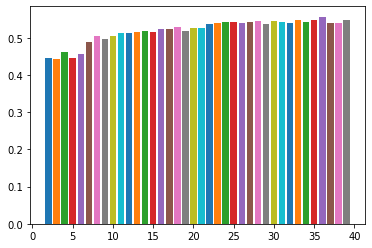

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = range(2,40)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f'{i} Clusters , Score = {silhouette_score(x,y_pred)}')
  plt.bar(i,silhouette_score(x,y_pred))


In [37]:
k = 36
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=36, random_state=0)

In [38]:
y = model.predict(x)
y

array([35, 34, 34, ...,  8,  4,  8], dtype=int32)

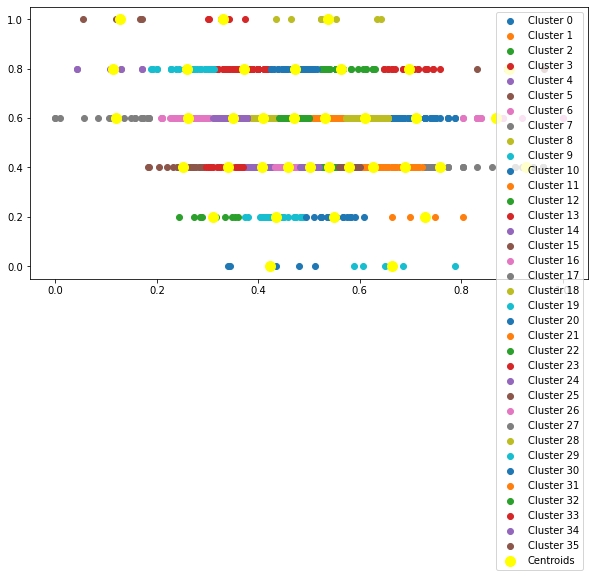

In [39]:
plt.figure(figsize = (10,5))
for i in range(k): # i iterates from 0 to 4
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'Centroids')
plt.legend()